_____________________________________________________________________________________________________________________________________________________________________________________________

Инфо

C:\Users\Shark\AppData\Local\Temp\ipykernel_17724\1809274672.py:4: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,145

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB
[0 1]
[nan  1.  0.]
[nan  0.  1.]
[     nan 7464071.]
[     nan 7464071.]
[     nan 7464071.]
[     nan 7464071.]
[     nan 7464071.]
[     nan 7464071.]
[     nan 7464071.]
[     nan 7464071.]
[     nan 7464071.]
[     nan 7464071.]
[      nan 18089112.]
[      nan 18089112.]
[      nan 12105887.]
[      nan 12105887.]
[       nan 15097499.5]
[       nan 15097499.5]
[      nan 12105887.]
[      nan 12105887.]
[      nan 12105887.]
[      nan 12105887.]
[nan  0.  1.]
[nan  1.  0.]
[nan 'off' 'on']
[nan 'on' 'off']
[nan 'on' 'off']
[nan 'off' 'on']
[nan 'on' 'off']
[nan 'off' 'on']
[nan 'on' 'off']
[nan 'on' 'off']
[nan 'РЕН_Тренд']
[nan 'page_load' 'scroll']
[nan 'Google' 'Yandex']
[nan 'Yandex' 'Google']
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan

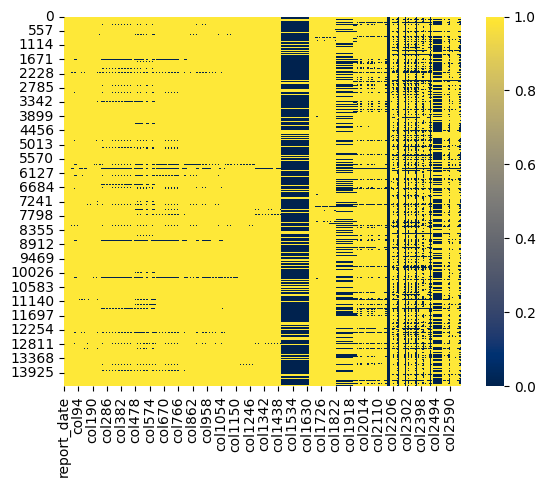

In [2]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("train.csv")

#############################################################################################################################################

df.info()

#############################################################################################################################################

sns.heatmap(df.isnull(), cmap='cividis', annot_kws={'size': 15000})

#############################################################################################################################################

for elm in df.columns:
    nuv = df[elm].nunique()
    if nuv < 2: print(df[elm].unique())

#############################################################################################################################################

print(len(df['col1454'].unique()))
    

_____________________________________________________________________________________________________________________________________________________________________________________________

Поиск процентов

In [ ]:
import pandas as pd

df = pd.read_csv("train.csv")

dn = []
nop_list = []
percent = 20

for elm in df.columns:
    nop = len(df) - df.isnull().sum()[elm]
    if nop < len(df) / 100 * percent: nop_list.append(nop)

for i in range(1, 21):
    asist = []

    for elm in nop_list:
        if elm < len(df) / 100 * i: asist.append(nop)

    dn.append(len(asist))

print(dn)

_____________________________________________________________________________________________________________________________________________________________________________________________
Поиск маловлиятельных столбцов

In [ ]:
import pandas as pd

#############################################################################################################################################

df = pd.read_csv("train.csv")

#############################################################################################################################################

numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df = numeric_df.drop(['client_id','target'], axis=1) 

percent = 10

for elm in numeric_df.columns:

    asis = df[elm].corr(df['target'])

    if asis >= percent / 100: print(f"{elm} : {asis}")
